## 1. Load Data

In [192]:
import numpy as np
import pandas as pd

In [193]:
pd.set_option("display.max_columns", None)

data_path = "../data/raw/diamonds.csv"
df = pd.read_csv(data_path, index_col=0)

In [194]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [196]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 2. Data Cleaning

In [197]:
invalid_dimension = df[(df["x"] <= 0) | (df["y"] <= 0) | (df["z"] <= 0)]
invalid_dimension.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [198]:
df = df[(df["x"] > 0) & (df["y"] > 0) & (df["z"] > 0)]
df.shape

(53920, 10)

In [199]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 3. Ordinal Encoding

In [200]:
df["cut"].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [201]:
cut_map = {
    "Fair": 1,
    "Good" : 2,
    "Very Good": 3,
    "Premium": 4,
    "Ideal": 5,
}

df["cut"] = df["cut"].map(cut_map)

In [202]:
df["color"].value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [203]:
color_map = {
    'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7
}

df["color"] = df["color"].map(color_map)

In [204]:
df["clarity"].value_counts()

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

In [205]:
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 
    'VVS2': 6, 'VVS1': 7, 'IF': 8,
}

df["clarity"] = df["clarity"].map(clarity_map)

In [206]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


## 4. EDA

In [207]:
import math
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
def plot_distribution_histogram(data: pd.DataFrame, numerical_col: List, n_col: int = 3):
    n_row = math.ceil(data.shape[1] / n_col)
    plt.figure(figsize=(5*n_col, 4*n_row))

    for index, feature in enumerate(numerical_col):
        plt.subplot(n_row, n_col, index + 1)
        mean_val = data[feature].mean()
        median_val = data[feature].median()

        sns.histplot(data=df, x=feature, color="skyblue", stat="density", label="Histogram")
        sns.kdeplot(data=df, x=feature, color="blue", linewidth="1.5", label="KDE (Density)")
        plt.axvline(mean_val, linestyle="--", color="green", label=f"Mean: {mean_val:.0f}")
        plt.axvline(median_val, linestyle="--", color="red", label=f"Median: {median_val:.0f}")

        plt.title(f"Distribution of {feature}", fontsize=14)
        plt.legend(loc="upper right")
        plt.xlabel(xlabel=f"{feature}")
    
    plt.tight_layout()
    plt.show()

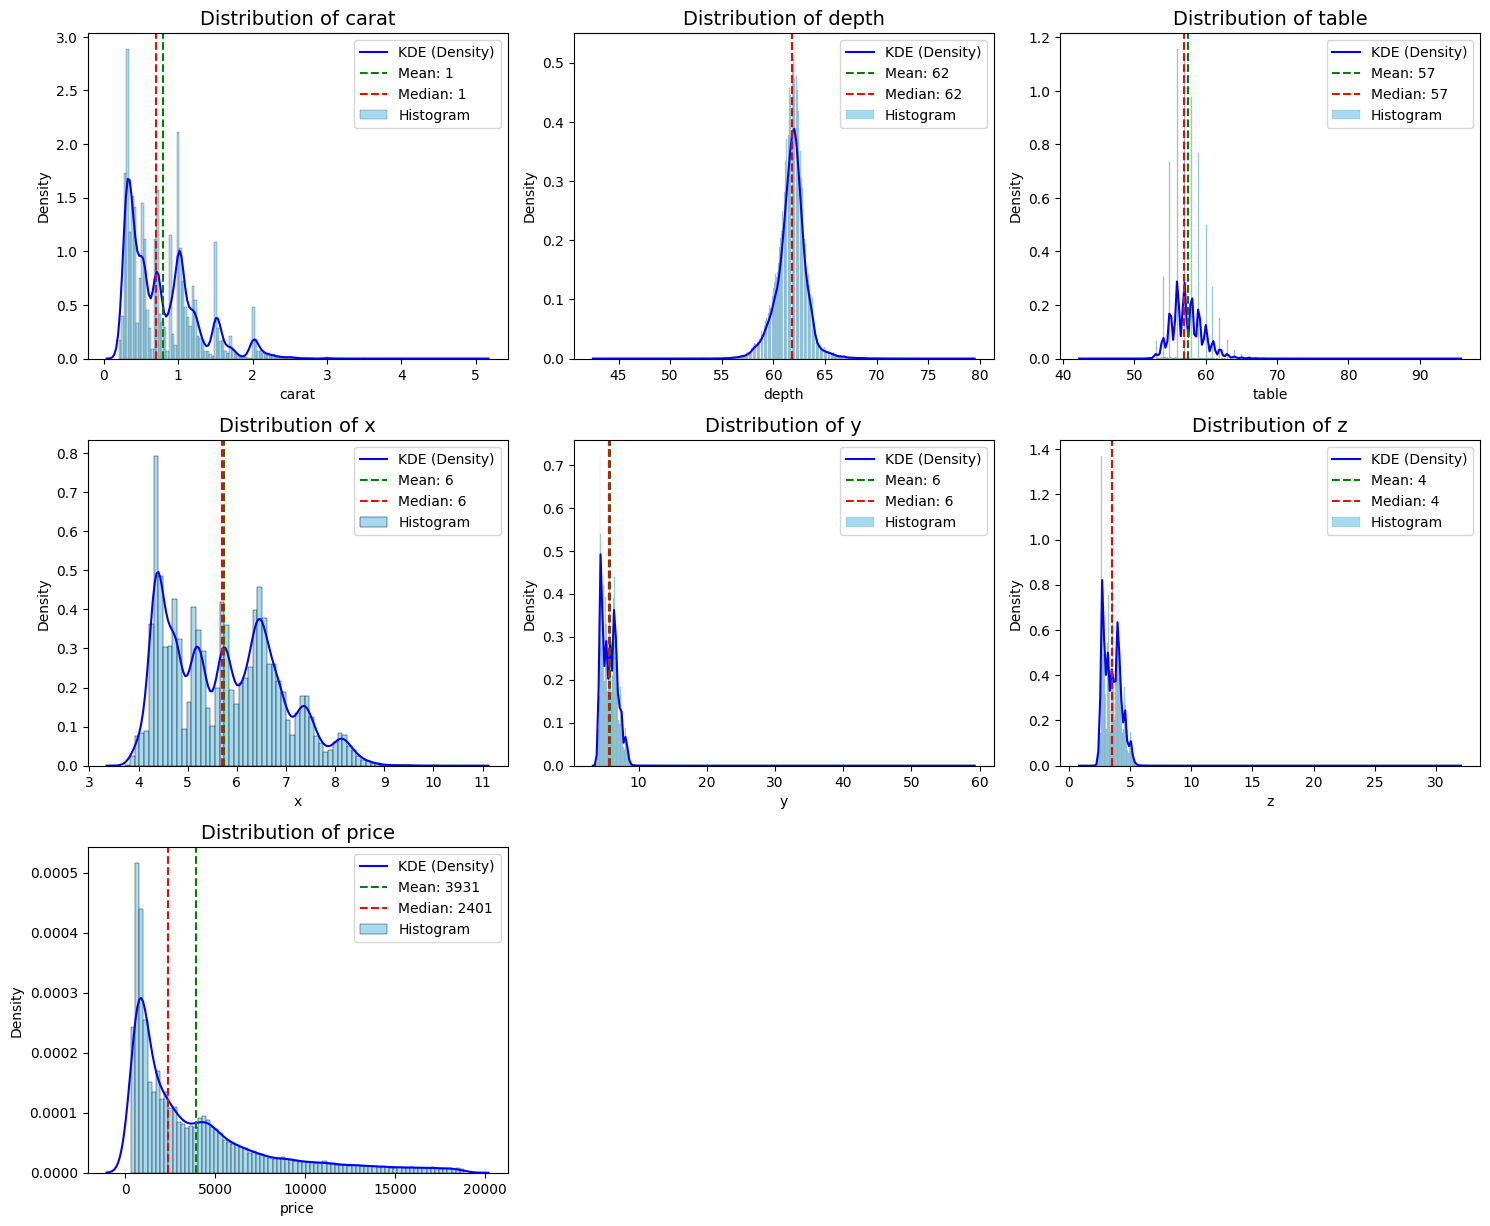

In [209]:
numerical_col = ["carat", "depth", "table", "x", "y", "z", "price"]
plot_distribution_histogram(df, numerical_col)

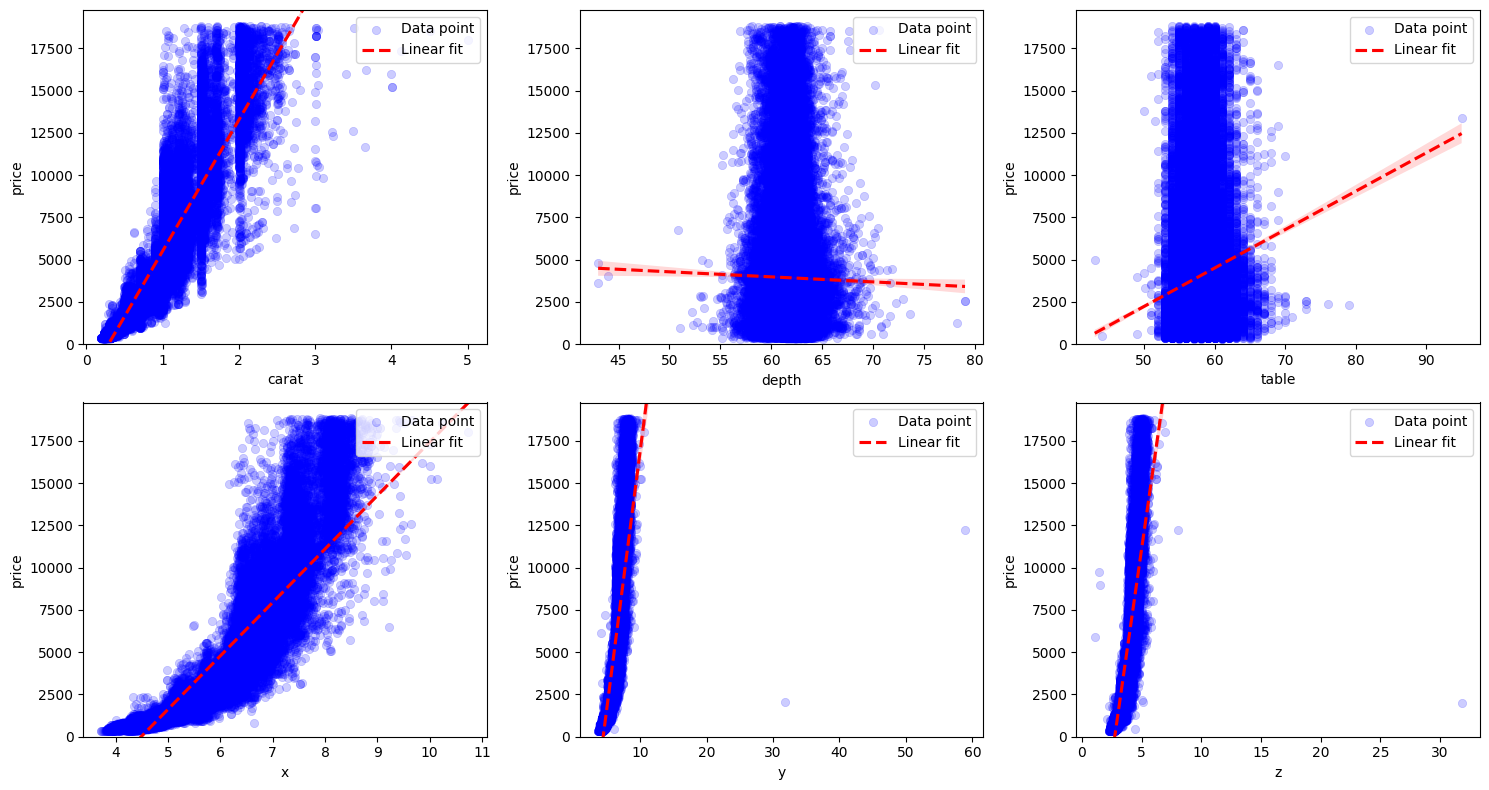

In [210]:
numerical_features = ["carat", "depth", "table", "x", "y", "z"]

n_col = 3
n_row = math.ceil(len(numerical_features) / n_col)

plt.figure(figsize=(5 * n_col, 4 * n_row))

max_y_limit = df["price"].max() * 1.05

for index, feature in enumerate(numerical_features):
    plt.subplot(n_row, n_col, index + 1)
    sns.scatterplot(data=df, x=feature, y="price", color="blue", alpha= 0.2, edgecolor=None, label="Data point")
    sns.regplot(data=df, x=feature, y="price", scatter=False, color="red", line_kws={'linestyle': '--'}, label="Linear fit")

    plt.ylim(0, max_y_limit)
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()



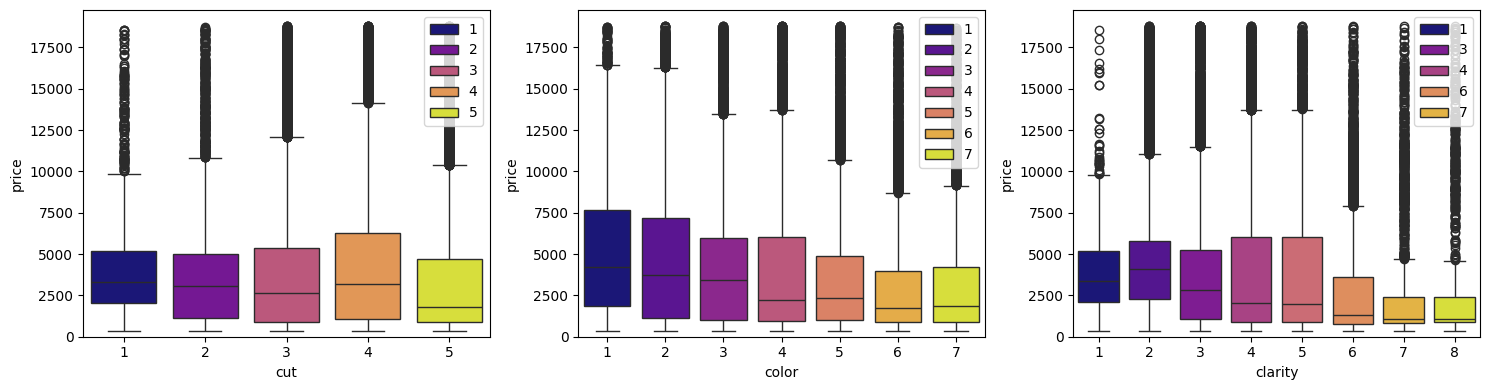

In [211]:
categorical_features = ["cut", "color", "clarity"]

n_col = 3
n_row = 1

plt.figure(figsize=(5 * n_col, 4* n_row))

max_y_limit = df["price"].max() * 1.05

for index, feature in enumerate(categorical_features):
    plt.subplot(n_row, n_col, index + 1)
    sns.boxplot(data=df, x=feature, y="price", hue=feature, palette="plasma")

    plt.ylim(0, max_y_limit)
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

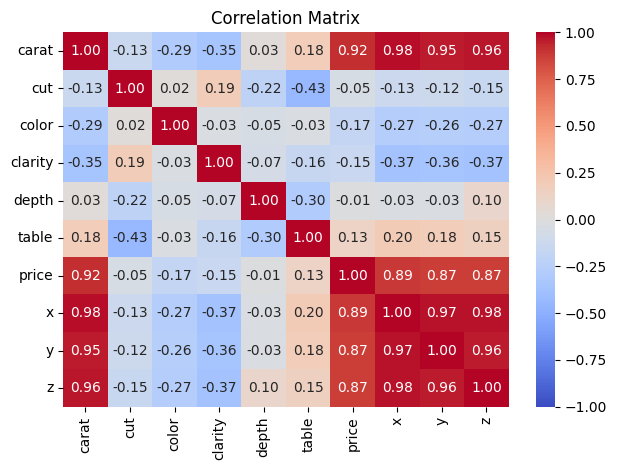

In [212]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, cmap="coolwarm", annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## 5. Features Engineering

In [213]:
import numpy as np
import pandas as pd

In [214]:
# Create new data from df for polynomial features
df_poly = df.copy()

In [215]:
# Remove outliers
df_poly = df_poly[(df_poly["depth"]<75)&(df_poly["depth"]>50)]
df_poly = df_poly[(df_poly["table"]<80)&(df_poly["table"]>40)]
df_poly = df_poly[(df_poly["y"]<30)]
df_poly = df_poly[(df_poly["z"]<10)&(df_poly["z"]>2)]
df_poly.shape


(53907, 10)

In [216]:
# Dimension reduction for x, y, z (which have strong correlation)
df_poly["volume"] = df_poly["x"] * df_poly["y"] * df_poly["z"]

cols_to_check = ["price", "x", "y", "z", "volume"]
print(df_poly[cols_to_check].corr()["price"])

df_poly = df_poly.drop(columns=["x", "y", "z"])

price     1.000000
x         0.887212
y         0.888807
z         0.882634
volume    0.923642
Name: price, dtype: float64


In [217]:
# Log transform for right skewed data
log_feature = ["carat", "volume", "price"]
df_poly[log_feature] = pd.DataFrame(np.log1p(df_poly[log_feature]))

In [218]:
df_poly.head(5)

,carat,cut,color,clarity,depth,table,price,volume
1,0.207014,5,6,2,61.5,55.0,5.789960,3.668729
2,0.190620,4,6,3,59.8,61.0,5.789960,3.569698
3,0.207014,2,6,5,56.9,65.0,5.793014,3.665531
4,0.254642,4,2,4,62.4,58.0,5.814131,3.865447
5,0.270027,2,1,2,63.3,58.0,5.817111,3.968729


In [219]:
from typing import List

def add_squared_features(data: pd.DataFrame, features: List[str], degree: int = 2) -> pd.DataFrame:
    for feature in features:
        for i in range(2, degree + 1):
            data[f"{feature}^{i}"] = data[feature]**i
    
    return data

def add_interaction_features(data: pd.DataFrame, 
                             primary_feature: str, 
                             interaction_features: List[str],
                             degree: int = 2) -> pd.DataFrame:
    
    add_squared_features(data, [primary_feature], degree)

    for feature in interaction_features:
        add_squared_features(data, [feature], degree)
        data[f"{primary_feature}_x_{feature}"] = data[primary_feature] * data[feature]
        
        for i in range(2, degree):
            data[f"{primary_feature}^{i}_x_{feature}"] = data[primary_feature]**i * data[feature]
            
    return data

In [220]:
add_squared_features(df_poly, ["volume"], 3)

,carat,cut,color,clarity,depth,table,price,volume,volume^2,volume^3
1,0.207014,5,6,2,61.5,55.0,5.789960,3.668729,13.459569,49.379505
2,0.190620,4,6,3,59.8,61.0,5.789960,3.569698,12.742741,45.487733
3,0.207014,2,6,5,56.9,65.0,5.793014,3.665531,13.436118,49.250510
4,0.254642,4,2,4,62.4,58.0,5.814131,3.865447,14.941677,57.756255
5,0.270027,2,1,2,63.3,58.0,5.817111,3.968729,15.750813,62.510714
...,...,...,...,...,...,...,...,...,...,...
53936,0.542324,5,7,3,60.8,57.0,7.922261,4.761490,22.671786,107.951483
53937,0.542324,2,7,3,63.1,55.0,7.922261,4.780049,22.848868,109.218704
53938,0.530628,3,7,3,62.8,60.0,7.922261,4.748835,22.551436,107.093051
53939,0.620576,4,3,2,61.0,58.0,7.922261,4.954179,24.543886,121.594797


In [221]:
interaction_features = ["cut", "color", "clarity"]
add_interaction_features(df_poly, "carat", interaction_features, 3)

,carat,cut,color,clarity,depth,table,price,volume,volume^2,volume^3,carat^2,carat^3,cut^2,cut^3,carat_x_cut,carat^2_x_cut,color^2,color^3,carat_x_color,carat^2_x_color,clarity^2,clarity^3,carat_x_clarity,carat^2_x_clarity
1,0.207014,5,6,2,61.5,55.0,5.789960,3.668729,13.459569,49.379505,0.042855,0.008872,25,125,1.035071,0.214274,36,216,1.242085,0.257129,4,8,0.414028,0.085710
2,0.190620,4,6,3,59.8,61.0,5.789960,3.569698,12.742741,45.487733,0.036336,0.006926,16,64,0.762481,0.145344,36,216,1.143722,0.218017,9,27,0.571861,0.109008
3,0.207014,2,6,5,56.9,65.0,5.793014,3.665531,13.436118,49.250510,0.042855,0.008872,4,8,0.414028,0.085710,36,216,1.242085,0.257129,25,125,1.035071,0.214274
4,0.254642,4,2,4,62.4,58.0,5.814131,3.865447,14.941677,57.756255,0.064843,0.016512,16,64,1.018569,0.259371,4,8,0.509284,0.129685,16,64,1.018569,0.259371
5,0.270027,2,1,2,63.3,58.0,5.817111,3.968729,15.750813,62.510714,0.072915,0.019689,4,8,0.540054,0.145829,1,1,0.270027,0.072915,4,8,0.540054,0.145829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.542324,5,7,3,60.8,57.0,7.922261,4.761490,22.671786,107.951483,0.294116,0.159506,25,125,2.711621,1.470578,49,343,3.796270,2.058809,9,27,1.626973,0.882347
53937,0.542324,2,7,3,63.1,55.0,7.922261,4.780049,22.848868,109.218704,0.294116,0.159506,4,8,1.084649,0.588231,49,343,3.796270,2.058809,9,27,1.626973,0.882347
53938,0.530628,3,7,3,62.8,60.0,7.922261,4.748835,22.551436,107.093051,0.281566,0.149407,9,27,1.591885,0.844699,49,343,3.714398,1.970964,9,27,1.591885,0.844699
53939,0.620576,4,3,2,61.0,58.0,7.922261,4.954179,24.543886,121.594797,0.385115,0.238993,16,64,2.482306,1.540461,9,27,1.861729,1.155346,4,8,1.241153,0.770230


## 6. Data Preprocessing

In [222]:
# Get X (features), y (label)
y = df_poly["price"]
X = df_poly.drop(columns="price")

y.info()
X.info()

<class 'pandas.core.series.Series'>
Index: 53907 entries, 1 to 53940
Series name: price
Non-Null Count  Dtype  
--------------  -----  
53907 non-null  float64
dtypes: float64(1)
memory usage: 842.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 53907 entries, 1 to 53940
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53907 non-null  float64
 1   cut                53907 non-null  int64  
 2   color              53907 non-null  int64  
 3   clarity            53907 non-null  int64  
 4   depth              53907 non-null  float64
 5   table              53907 non-null  float64
 6   volume             53907 non-null  float64
 7   volume^2           53907 non-null  float64
 8   volume^3           53907 non-null  float64
 9   carat^2            53907 non-null  float64
 10  carat^3            53907 non-null  float64
 11  cut^2              53907 non-null  int64  
 12  cut^3            

In [223]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume',
       'volume^2', 'volume^3', 'carat^2', 'carat^3', 'cut^2', 'cut^3',
       'carat_x_cut', 'carat^2_x_cut', 'color^2', 'color^3', 'carat_x_color',
       'carat^2_x_color', 'clarity^2', 'clarity^3', 'carat_x_clarity',
       'carat^2_x_clarity'],
      dtype='object')

In [224]:
# Convert to numpy array
y_array = y.values
X_array= X.values

In [225]:
def split_data(X: np.ndarray,
               y: np.ndarray,
               test_ratio: float = 0.2,
               seed: int = 42) -> tuple:
    
    data_size = X.shape[0]
    train_size = int(data_size * ( 1 - test_ratio))

    # Create a randomized index list
    np.random.seed(seed=seed)
    indices = np.random.permutation(data_size)
    
    # Get index for train/test 
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]

    # Split data by randomized index
    X_train, X_test = X[train_indices], X[test_indices] 
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

In [226]:
# Split dataset to Train/Test (Test size = 0.2)
X_train, X_test, y_train, y_test = split_data(X_array, y_array)

# Split Train dataset to Train/Valid (Valid size = 0.15)
X_train, X_valid, y_train, y_valid = split_data(X_train, y_train)

In [227]:
import numpy as np

class RobustScaler:
    def __init__(self):
        self.median = None
        self.iqr = None
    
    def fit(self, data):
        self.median = np.median(data, axis=0)
        q75, q25 = np.percentile(data, [75, 25], axis=0)
        self.iqr = q75 - q25

        self.iqr = np.where(self.iqr == 0, 1, self.iqr) 

    def transform(self, data):
        if self.median is None or self.iqr is None:
            raise Exception(".fit() must be called before .transform()!")
        
        return (data - self.median) / self.iqr


    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [228]:
# Robust Scaling X_array
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [229]:
def add_bias(X: np.ndarray) -> np.ndarray:
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    return X_bias

In [230]:
# Add Bias
X_train = add_bias(X_train_scaled)

## 7. Modeling

In [231]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRidge:
    def __init__(self, X, y, epochs, batch_size, learning_rate, alpha):
        self.X = X
        self.y = y
        self.epochs = epochs
        self.batch_size = batch_size
        self.lr = learning_rate
        self.alpha = alpha
        self.data_size = X.shape[0]

        self.theta = np.random.randn(X.shape[1])
        self.loss = []
        self.accuracy = []

    def predict(self, X: np.ndarray) -> np.ndarray:
        result = X @ self.theta
        return result
    
    def r2_score(self, y: np.ndarray, y_predict: np.ndarray) -> np.floating:
        tss = np.sum((y - np.mean(y)) ** 2)
        rss = np.sum((y - y_predict) ** 2)

        return 1 - (rss / tss)

    def mse(self, y: np.ndarray, y_predict: np.ndarray) -> np.floating:
        mse = (y - y_predict) ** 2
        loss = np.mean(mse)

        return loss

    def fit(self):
        for epoch in range(self.epochs):
            print(f"--------------Epoch {epoch}--------------")
            # Get random index list
            indices = np.random.permutation(self.data_size)

            # Create shuffled train data
            X_rand = self.X[indices]
            y_rand = self.y[indices]
            
            # Metrics epoch 
            loss_epoch = []
            r2_score_epoch = [] 

            for batch in range(0, self.data_size, self.batch_size):
                # Get train data for batch
                X_batch = X_rand[batch:batch + self.batch_size]
                y_batch = y_rand[batch:batch + self.batch_size]

                # Predict y
                y_predict = self.predict(X_batch)

                # Loss Ridge
                theta_ridge = self.theta.copy()
                theta_ridge[0] = 0

                loss_batch = self.mse(y_batch, y_predict) + self.alpha * np.sum(theta_ridge**2)
                loss_epoch.append(loss_batch)

                # R2score
                r2_score = self.r2_score(y_batch, y_predict)
                r2_score_epoch.append(r2_score)

                # Gradient
                error = y_predict - y_batch
                grad_mse = (2 / self.batch_size) * (X_batch.T @ error)
                grad_ridge = 2 * self.alpha * theta_ridge

                gradient = grad_mse + grad_ridge

                # Update weights
                self.theta = self.theta - self.lr * gradient
            
            np.set_printoptions(suppress=True, precision=4, linewidth=150)
            print(f"loss: {loss_epoch[-1]:.4f}")
            print(f"theta: {self.theta}")

            avg_loss = np.mean(loss_epoch)
            avg_r2 = np.mean(r2_score_epoch)

            self.loss.append(avg_loss)
            self.accuracy.append(avg_r2)

        result = {"status": "Completed",
                  "final_mse": self.loss[-1],
                  "final_r2": self.accuracy[-1]
                  }
        
        return result

    def plot(self):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(self.loss, color="red")
        plt.xlabel("Epochs")
        plt.ylabel("RMSE")

        plt.subplot(1, 2, 2)
        plt.plot(self.accuracy, color="blue")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")

        plt.show()

### 7.1. Fit model

In [232]:
model = PolynomialRidge(X_train, 
                         y_train,
                         epochs=150,
                         batch_size=128,
                         learning_rate=0.001,
                         alpha=0.1)

model.fit()

--------------Epoch 0--------------
loss: 16.9348
theta: [ 2.4402  0.2123  1.5699  0.2953 -0.1286  0.7633  1.2086 -1.7426  0.1085  1.0161  1.013  -0.1602 -1.0486 -0.728   0.9202  1.1931  1.7662  0.5276
  0.5498 -0.5138 -0.6585  1.8324  0.4997  0.2047]
--------------Epoch 1--------------
loss: 9.3237
theta: [ 3.8055  0.1274  1.3413  0.2028 -0.3975  0.6441  1.1847 -1.825  -0.0368  0.8571  1.0113  0.0194 -1.0129 -0.6127  0.8618  1.211   1.7228  0.635
  0.3373 -0.5334 -0.7758  1.6817  0.3357  0.1968]
--------------Epoch 2--------------
loss: 5.1892
theta: [ 4.6625  0.0768  1.1693  0.0803 -0.5331  0.5588  1.0833 -1.8232 -0.1117  0.752   0.9709  0.0725 -0.9763 -0.533   0.7952  1.1616  1.5935  0.6084
  0.1675 -0.5633 -0.8262  1.5486  0.2646  0.1971]
--------------Epoch 3--------------
loss: 4.1634
theta: [ 5.2381  0.0553  1.0324 -0.0258 -0.602   0.4901  0.9584 -1.7692 -0.1394  0.6868  0.9249  0.0786 -0.9394 -0.4737  0.7374  1.0932  1.4514  0.5429
  0.0621 -0.5647 -0.8448  1.4253  0.2457  0.20

{'status': 'Completed',
 'final_mse': np.float64(0.06577845568676052),
 'final_r2': np.float64(0.966351303444176)}

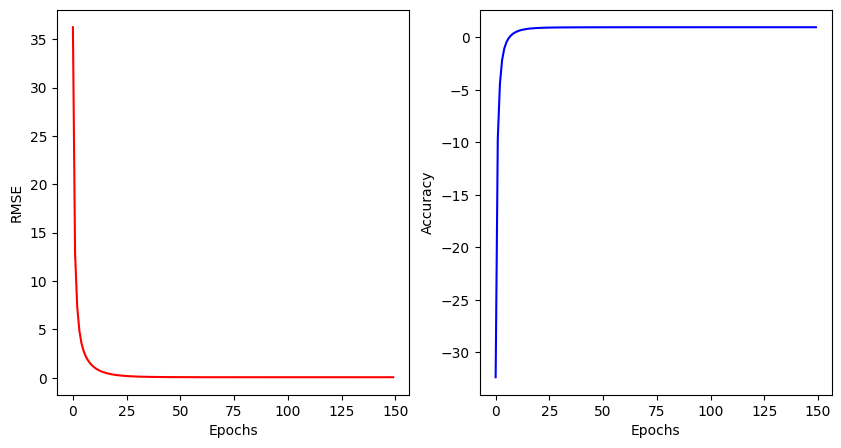

In [233]:
model.plot()

### 7.2. Validation

In [234]:
# Robust scaling for X_valid 
X_valid_scaled = scaler.transform(X_valid)

# Add bias
X_valid = add_bias(X_valid_scaled)

In [235]:
# Validation
y_predict = model.predict(X_valid)
loss_valid = model.mse(y_valid, y_predict)
r2_valid = model.r2_score(y_valid, y_predict)

print(f"mse: {loss_valid}, r2: {r2_valid}")

mse: 0.03360843642367227, r2: 0.9663417570023132


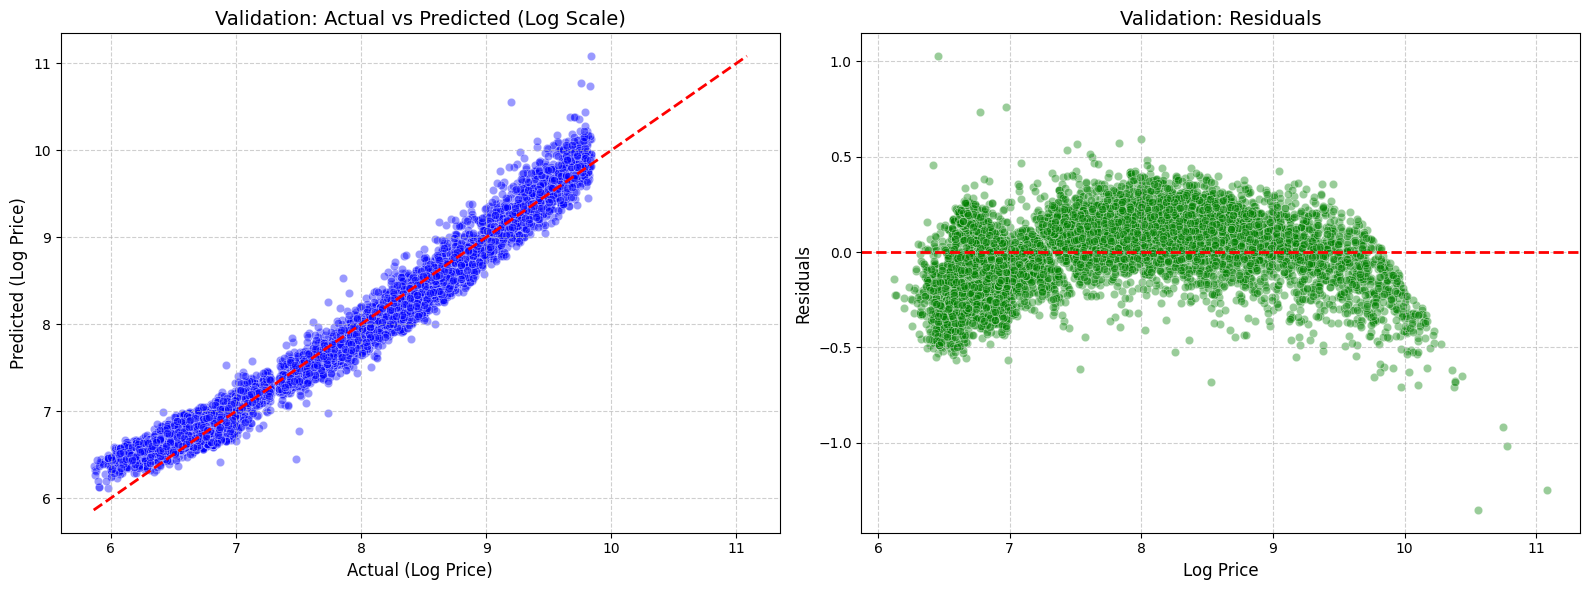

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_validation_diagnostics(y_true, y_pred):
    # Compute Residuals = Actual - Predicted
    residuals = y_true - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # --- Actual vs Predicted ---
    sns.scatterplot(x=y_true, y=y_pred, ax=axes[0], color="blue", alpha=0.4)
    
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[0].plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2)
    
    axes[0].set_title("Validation: Actual vs Predicted (Log Scale)", fontsize=14)
    axes[0].set_xlabel("Actual (Log Price)", fontsize=12)
    axes[0].set_ylabel("Predicted (Log Price)", fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # --- Residual Plot ---
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], color="green", alpha=0.4)
    
    axes[1].axhline(y=0, color="red", linestyle="--", linewidth=2)
    
    axes[1].set_title("Validation: Residuals", fontsize=14)
    axes[1].set_xlabel("Log Price", fontsize=12)
    axes[1].set_ylabel("Residuals", fontsize=12)
    axes[1].grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

plot_validation_diagnostics(y_valid, y_predict)